In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [74]:
root_path = r'Y:\\TR_Paper_Codes\\'
imgname = 's.jpg'

In [80]:
#Read map
img = mpimg.imread(root_path+imgname)
img = img.mean(axis=2)

rw = np.where(img>70)[0]#row index of white points
cw = np.where(img>70)[1]
img[rw,cw] = 255

rb = np.where(img<=70)[0]#row index of black points
cb = np.where(img<=70)[1]
img[rb,cb] = 0


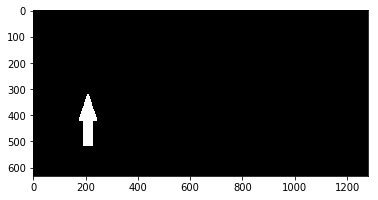

In [83]:
l=1
c_rw = [i+int(rw.mean()*np.ones(l)[i])-int(l/2) for i in range(np.size(rw.mean()*np.ones(l)))] #center coordinate of white area
c_cw = [i+int(cw.mean()*np.ones(l)[i])-int(l/2) for i in range(np.size(cw.mean()*np.ones(l)))]

(c_cw,c_rw) = np.meshgrid(c_cw,c_rw)

img[c_rw,c_cw]=100

plt.imshow(img,cmap='gray')

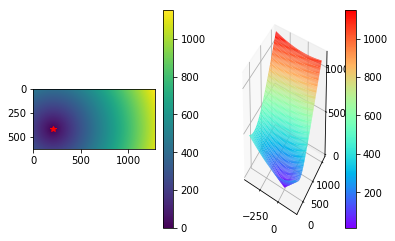

In [90]:
#generate the potential field
t_r = np.arange(np.shape(img)[0]) - c_rw
t_c = np.arange(np.shape(img)[1]) - c_cw

(t_r,t_c) = np.meshgrid(t_r,t_c)
distance_field = ((np.array([i**2 for i in t_r]) + np.array([i**2 for i in t_c]))**0.5)

fig = plt.figure()
f1 = fig.add_subplot(121)
r1 = f1.imshow(distance_field.T)#this transpose only fot visulization
f1.plot(c_cw,c_rw,'r*')#this transpose only fot visulization
plt.colorbar(r1)

f2 = fig.add_subplot(122,projection = '3d')
f2.set_aspect('equal')
r2 = f2.plot_surface(t_r,t_c,distance_field,cmap='rainbow')
plt.colorbar(r2)